# Historical-Future scenarios

In [ ]:
%cd ..

In [38]:
import re
import yaml
import numpy as np
import pandas as pd
from mce.core import ScenarioBase
from mce.util.plot_base import PlotBase

In [71]:
from mce.core.forcing import RfAll

In [72]:
myplt = PlotBase(palette='ipcc_wg1')
forcing = RfAll()

## Input data

In [4]:
ds_hist = ScenarioBase(outpath='datain/ds_historical.h5', mode='r')
ds_rcmip2 = ScenarioBase(outpath='datain/ds_rcmip2.h5', mode='r')
ds_ar6db_imp = ScenarioBase(outpath='datain/ds_ar6db_imp.h5', mode='r')

[2025-04-18 15:56:30 mce.core] INFO:datain/ds_historical.h5 already exists
[2025-04-18 15:56:30 mce.core] INFO:file datain/ds_historical.h5 opened with mode=r
[2025-04-18 15:56:30 mce.core] INFO:datain/ds_rcmip2.h5 already exists
[2025-04-18 15:56:30 mce.core] INFO:file datain/ds_rcmip2.h5 opened with mode=r
[2025-04-18 15:56:30 mce.core] INFO:datain/ds_ar6db_imp.h5 already exists
[2025-04-18 15:56:30 mce.core] INFO:file datain/ds_ar6db_imp.h5 opened with mode=r


In [5]:
list(ds_hist.file)

['historical', 'source']

In [6]:
list(ds_rcmip2.file)

['1pctCO2',
 '1pctCO2-4xext',
 'abrupt-0p5xCO2',
 'abrupt-2xCO2',
 'abrupt-4xCO2',
 'esm-bell-1000PgC',
 'esm-bell-2000PgC',
 'esm-bell-750PgC',
 'esm-pi-CO2pulse',
 'esm-pi-cdr-pulse',
 'esm-piControl',
 'historical',
 'historical-cmip5',
 'piControl',
 'rcp26',
 'rcp45',
 'rcp60',
 'rcp85',
 'ssp119',
 'ssp126',
 'ssp245',
 'ssp370',
 'ssp370-lowNTCF-aerchemmip',
 'ssp370-lowNTCF-gidden',
 'ssp434',
 'ssp460',
 'ssp534-over',
 'ssp585']

In [52]:
data_hist = {
    cat: pd.DataFrame({
        (k, v.attrs['units']): v for k, v in g.items()
    }).set_index(('time', 'yr'))
    for cat, g in ds_hist.file['historical/input'].items()
}

In [58]:
data_hist['emis_ghg']

,C2F6,C3F8,C7F16,C8F18,CCl4,CF4,CFC-11,CFC-112,CFC-112a,CFC-113,...,Halon-2402,N2O,NF3,SF6,SO2F2,c-C4F8,i-C6F14,n-C4F10,n-C5F12,n-C6F14
,kt C2F6 yr-1,kt C3F8 yr-1,kt C7F16 yr-1,kt C8F18 yr-1,kt CCl4 yr-1,kt CF4 yr-1,kt CFC-11 yr-1,kt CFC-112 yr-1,kt CFC-112a yr-1,kt CFC-113 yr-1,...,kt Halon-2402 yr-1,Mt N2O yr-1,kt NF3 yr-1,kt SF6 yr-1,kt SO2F2 yr-1,kt c-C4F8 yr-1,kt i-C6F14 yr-1,kt n-C4F10 yr-1,kt n-C5F12 yr-1,kt n-C6F14 yr-1
"(time, yr)",,,,,,,,,,,,,,,,,,,,,
1750,3.139314e-09,0.000000,0.000000,0.000000,0.021211,0.010577,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.884,0.000000,0.000000,0.000011,0.000000,0.000000,0.000000,0.000000,0.000000
1751,3.139314e-09,0.000000,0.000000,0.000000,0.021211,0.010577,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.874,0.000000,0.000000,0.000011,0.000000,0.000000,0.000000,0.000000,0.000000
1752,3.139314e-09,0.000000,0.000000,0.000000,0.021211,0.010577,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.871,0.000000,0.000000,0.000011,0.000000,0.000000,0.000000,0.000000,0.000000
1753,3.139314e-09,0.000000,0.000000,0.000000,0.021211,0.010577,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.873,0.000000,0.000000,0.000011,0.000000,0.000000,0.000000,0.000000,0.000000
1754,3.139314e-09,0.000000,0.000000,0.000000,0.021211,0.010577,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.892,0.000000,0.000000,0.000011,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,2.204322e+00,0.672645,0.104102,0.079818,39.536066,14.782239,48.631490,0.226264,0.077487,4.765295,...,0.655118,11.259,2.556955,9.105593,3.102341,2.212444,0.084858,0.175600,0.184909,0.099912
2021,2.569923e+00,0.672900,0.104136,0.079843,37.330191,16.335750,47.559079,0.226264,0.078040,6.205552,...,0.655118,11.558,2.561359,10.010940,3.152378,2.237850,0.084885,0.175666,0.184954,0.099943


In [61]:
data_hist['emis_natural']

,CH4,N2O
,Mt CH4 yr-1,Mt N2O yr-1
"(time, yr)",,
1750,139.089461,18.528125
1751,139.187113,18.527241
1752,139.284137,18.526319
1753,139.380267,18.525340
1754,139.475993,18.524329
...,...,...
2019,160.235753,20.939855
2020,163.201854,21.132143


In [60]:
data_hist['emis_slcf'].drop(['CH4', 'N2O'], axis=1, level=0)

,BC,CO,NH3,NMVOC,NOx,OC,SO2
,Mt BC yr-1,Mt CO yr-1,Mt NH3 yr-1,Mt NMVOC yr-1,Mt NO2 yr-1,Mt OC yr-1,Mt SO2 yr-1
"(time, yr)",,,,,,,
1750,2.117613,348.399748,6.746764,60.847744,19.412419,15.999935,2.347382
1751,2.093255,343.798221,6.678384,59.916853,19.193014,15.742623,2.313252
1752,2.085127,341.680338,6.636892,59.463534,19.195734,15.590012,2.300284
1753,2.093251,343.546226,6.698018,59.860695,19.111957,15.739703,2.312427
1754,2.121135,349.685845,6.830938,61.107100,19.260410,16.117545,2.362232
...,...,...,...,...,...,...,...
2020,6.949436,727.018794,66.219291,185.329595,122.308705,29.221131,68.227768
2021,7.173922,785.859058,68.244617,198.995725,125.019717,33.965894,70.870916


In [14]:
g = ds_ar6db_imp.file['source/reference']
map_var_name = dict(x for x in enumerate(g['var_name_infilled'].asstr()))
map_units = dict(x for x in enumerate(g['units_infilled'].asstr()))

In [27]:
data = {
    k: v['Infilled Emissions']
    for k, v in ds_ar6db_imp.file['source/data'].items()
}

In [87]:
df = pd.concat({
    k: pd.DataFrame(
        v['value'],
        columns=v['year'],
        index=pd.MultiIndex.from_tuples(zip(v['variable_id'], v['units_id'])),
    )
    for k, v in data.items()
})
df = (
    df
    .rename(map_var_name, level=1)
    .rename(map_units, level=2)
)

# Drop Harmonized|Emissions
prefix = 'AR6 climate diagnostics|Infilled|Emissions|'
df = (
    df
    .loc[[x.startswith(prefix) for x in df.index.get_level_values(1)]]
    .rename(lambda x: x.replace(prefix, ''), level=1)
)
# Unnecessary basket species
df = df.drop(['F-Gases', 'HFC', 'PFC'], level=1)

In [88]:
def conv_ghg(x):
    x = re.sub(r'( ?)(HFC|PFC)\|', r'\1', x)
    x = re.sub(r'( ?)(CFC|HFC|PFC|HCFC|Halon)(.)', r'\1\2-\3', x)
    x = re.sub('(C4F10|C5F12|C6F14)', r'n-\1', x)
    x = (
        x
        .replace('HFC-4310mee', 'HFC-43-10mee')
        .replace('cC4F8', 'c-C4F8')
        .replace('HFC-245ca', 'HFC-245fa') # replacing despite small differences 
        .replace('HFC-43-10', 'HFC-43-10mee')
        .replace('VOC', 'NMVOC')
        .replace('Sulfur', 'SO2')
        .replace('CO2|Energy and Industrial Processes', 'CO2|FFI')
    )
    return x

df = df.rename(conv_ghg, level=1).rename(conv_ghg, level=2)

In [89]:
[
    x for x in set(df.index.get_level_values(1)) if x not in forcing.ghgs
]

['NH3', 'CO2|FFI', 'BC', 'CO2|AFOLU', 'NOx', 'SO2', 'CO', 'OC', 'NMVOC']

In [93]:
def f_cat(x):
    if x in ['BC', 'CO', 'NH3', 'NMVOC', 'NOx', 'OC', 'SO2']:
        cat = 'slcf'
    elif x.startswith('CO2'):
        cat = 'co2'
    else:
        cat = 'ghg'
    return cat

dfg = df.groupby([f_cat(x) for x in df.index.get_level_values(1)])

In [131]:
def merge(df_hist, df_future):
    ntrans = 4
    wgt_hist = pd.Series(np.linspace(0.8, 0.2, ntrans), index=df_hist.index[-ntrans:])
    year_start_merge = wgt_hist.index[0]
    year_end = 2100

    df_future = df_future.loc[year_start_merge:year_end]
    wgt = pd.Series(1., index=df_future.index)
    wgt.iloc[:ntrans] = np.linspace(0.2, 0.8, 4)

    # Ensure weight validity
    if not np.allclose(pd.concat([wgt_hist, wgt], axis=1).sum(axis=1), 1.):
        raise ValueError('invalid weights')

    data = {}

    for k, df in df_future.T.groupby(level=0):
        df = df.droplevel(0).T
        data[k] = (
            (df_hist.loc[year_start_merge:] * wgt_hist.values[:, None])
            .reindex(df.index, fill_value=0.)
            + df * wgt.values[:, None]
        ).dropna(axis=1) # drop variables not in future

    return data

In [141]:
df = (
    dfg.get_group('co2')
    .rename(lambda x: x.replace('CO2|', ''), level=1)
    .rename(lambda x: x.replace('Mt CO2/yr', 'Gt C yr-1'), level=2)
    .mul(12e-3/44.)
    .T
)
data = merge(data_hist['emis_co2'], df)

In [139]:
df0 = data_hist['emis_co2'].loc[2000:]

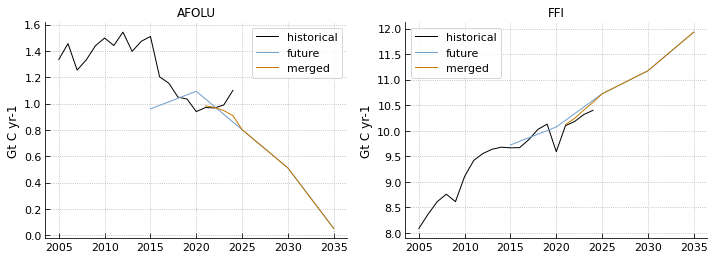

In [146]:
myplt.init_regular(2, col=2)
scenario = 'CurPol'
df_merged = data[scenario]
slc = slice(2005, 2035)
for ax, (k, dm) in zip(myplt(), df_merged.items()):
    d0 = df0[k].loc[slc]
    d1 = df[scenario][k].loc[slc]
    dm = dm.loc[slc]
    ax.plot(d0.index, d0, label='historical')
    ax.plot(d1.index, d1, label='future')
    ax.plot(dm.index, dm, label='merged')
    ax.legend()
    ax.set_title(k[0])
    ax.set_ylabel(k[1])
    ax.grid()


In [102]:
(
    dfg.get_group('ghg')
    .rename(lambda x: x.replace('/yr', ' yr-1'), level=2)
    .T
)

CurPol                                                 \
             CCl4         CFC-11         CFC-113         CFC-114   
     kt CCl4 yr-1 kt CFC-11 yr-1 kt CFC-113 yr-1 kt CFC-114 yr-1   
2015    47.547600      43.573400        0.874200        1.669600   
2016    45.018546      41.881747        0.781611        1.515316   
2017    42.482563      40.185459        0.688768        1.360609   
2018    39.953508      38.493806        0.596179        1.206325   
2019    37.424454      36.802153        0.503589        1.052041   
...           ...            ...             ...             ...   
2096     0.331232       1.347173        0.000000        0.000090   
2097     0.309905       1.286931        0.000000        0.000067   
2098     0.288637       1.226854        0.000000        0.000045   
2099     0.267368       1.166777        0.000000        0.000022   
2100     0.246100       1.106700        0.000000        0.000000   

                                                                  \
             CFC-115         CFC-12         CH2Cl2         CH3Br   
     kt CFC-115 yr-1 kt CFC-12 yr-1 kt CH2Cl2 yr-1 kt CH3Br yr-1   
2015        1.671400      14.609600    1267.980600    133.823000   
2016        1.614253      12.888683    1234.689162    133.433733   
2017        1.556949      11.163051    1201.306514    133.043400   
2018        1.499802       9.442134    1168.015076    132.654133   
2019        1.442655       7.721217    1134.723638    132.264867   
...              ...            ...            ...           ...   
2096        0.081233       0.007199     330.182512    127.871769   
2097        0.078061       0.008402     324.012315    127.709244   
2098        0.074898       0.009601     317.858977    127.547162   
2099        0.071735       0.010801     311.705638    127.385081   
2100        0.068572       0.012000     305.552300    127.223000   

                                    ...           SP                  \
             CH3CCl3         CH3Cl  ...         C3F8         n-C4F10   
     kt CH3CCl3 yr-1 kt CH3Cl yr-1  ... kt C3F8 yr-1 kt n-C4F10 yr-1   
2015             0.0   5404.806900  ...     0.447800        0.099400   
2016             0.0   5377.558151  ...     0.469588        0.104235   
2017             0.0   5350.234748  ...     0.491436        0.109083   
2018             0.0   5322.985998  ...     0.513224        0.113917   
2019             0.0   5295.737249  ...     0.535012        0.118752   
...              ...           ...  ...          ...             ...   
2096             0.0   4989.532249  ...     0.004740        0.001061   
2097             0.0   4982.049754  ...     0.004229        0.000949   
2098             0.0   4974.587702  ...     0.003719        0.000837   
2099             0.0   4967.125651  ...     0.003210        0.000725   
2100             0.0   4959.663600  ...     0.002700        0.000612   

                                                                              \
             n-C5F12         n-C6F14         C7F16         C8F18         CF4   
     kt n-C5F12 yr-1 kt n-C6F14 yr-1 kt C7F16 yr-1 kt C8F18 yr-1 kt CF4 yr-1   
2015        0.043500        0.350000      0.233800      0.101400   10.869900   
2016        0.045611        0.335367      0.245174      0.106337   11.204975   
2017        0.047729        0.319844      0.256579      0.111288   11.542137   
2018        0.049840        0.303429      0.267952      0.116225   11.881388   
2019        0.051952        0.286124      0.279326      0.121163   12.222726   
...              ...             ...           ...           ...         ...   
2096        0.000449        0.066639      0.002480      0.001080    0.925874   
2097        0.000399        0.064317      0.002210      0.000960    0.912128   
2098        0.000349        0.061952      0.001940      0.000840    0.898293   
2099        0.000299        0.059543      0.001670      0.000720    0.884369   
2100        0.000250        0.057091      0.001400      

In [105]:
(
    dfg.get_group('slcf')
    .rename(lambda x: x.replace('/yr', ' yr-1'), level=2)
    .T
)

CurPol                                                             \
             BC          CO         NH3         NOx         OC         SO2   
     Mt BC yr-1  Mt CO yr-1 Mt NH3 yr-1 Mt NO2 yr-1 Mt OC yr-1 Mt SO2 yr-1   
2015   9.727424  934.349885   65.279703  155.520450  34.746024  100.771167   
2016   9.486864  908.729608   65.917535  152.211398  33.647810   98.986454   
2017   9.247408  883.100412   66.554792  148.912323  32.547851   97.168599   
2018   9.009056  857.462298   67.191475  145.623224  31.446147   95.317603   
2019   8.771808  831.815266   67.827583  142.344101  30.342699   93.433465   
...         ...         ...         ...         ...        ...         ...   
2096   5.227633  581.785429   79.799528  100.282840  21.972891   90.661780   
2097   5.210577  581.704497   79.576495   99.332791  21.979631   88.521373   
2098   5.193521  581.623504   79.353462   98.382743  21.986357   86.380967   
2099   5.176466  581.542450   79.130430   97.432695  21.993070   84.240560   
2100   5.159410  581.461334   78.907397   96.482646  21.999769   82.100154   

                           GS                          ...    Ren-2.0  \
             NMVOC         BC          CO         NH3  ...         OC   
     Mt NMVOC yr-1 Mt BC yr-1  Mt CO yr-1 Mt NH3 yr-1  ... Mt OC yr-1   
2015    227.244819   9.727424  934.349885   65.279703  ...  34.746024   
2016    223.367135   9.365807  912.013958   65.033785  ...  33.938256   
2017    219.502067   9.006372  889.707504   64.787900  ...  33.130933   
2018    215.649614   8.649119  867.430525   64.542046  ...  32.324055   
2019    211.809777   8.294047  845.183019   64.296223  ...  31.517623   
...            ...        ...         ...         ...  ...        ...   
2096    156.451773   0.607579  204.526826   40.952544  ...   6.287704   
2097    155.805412   0.599214  203.802201   42.506413  ...   6.223121   
2098    155.160388   0.590849  203.078407   44.060282  ...   6.158574   
2099    154.516700   0.582484  202.355442   45.614150  ...   6.094063   
2100    153.874349   0.574120  201.633309   47.168019  ...   6.029588   

                                       SP                                      \
             SO2         NMVOC         BC          CO         NH3         NOx   
     Mt SO2 yr-1 Mt NMVOC yr-1 Mt BC yr-1  Mt CO yr-1 Mt NH3 yr-1 Mt NO2 yr-1   
2015  100.771167    227.244819   9.727424  934.349885   65.279703  155.520450   
2016   97.700171    223.342440   9.623742  920.685776   65.519555  153.564227   
2017   94.641556    219.448427   9.520248  907.039535   65.759407  151.617629   
2018   91.595321    215.562778   9.416941  893.411161   65.999259  149.680655   
2019   88.561468    211.685494   9.313821  879.800654   66.239111  147.753306   
...          ...           ...        ...         ...         ...         ...   
2096   14.472938     69.132162   2.616820  467.191893   25.513251   34.043020   
2097   14.338293     68.707071   2.611240  466.546532   25.492264   33.882540   
2098   14.203648     68.282835   2.605660  465.901617   25.471277   33.722060   
2099   14.069003     67.859455   2.600080  465.257146   25.450290   33.561580   
2100   13.934358     67.436930   2.594500  464.613121   25.429303   33.401100   

                                           
             OC         SO2         NMVOC  
     Mt OC yr-1 Mt SO2 yr-1 Mt NMVOC yr-1  
2015  34.746024  100.771167    227.244819  
2016  34.120806   98.981399    225.156160  
2017  33.496540   97.197819    223.076129  
2018  32.873228   95.420427    221.004727  
2019  32.250868   93.649222    218.941952  
...         ...         ...           ...  
2096  21.147114   10.457420     89.885386  
2097  21.103854   10.374840     89.352653  
2098  21.060638   10.292260     88.821245  
2099  21.017465   10.209680     88.291163  
2100  20.974334   10.127100     87.762404  

[86 rows x 63 columns]

In [75]:
# Select five SSP scenarios from RCMIP2
scenarios_ssp = ['ssp119', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

In [76]:
list(ds_ar6db_imp.file)

['CurPol', 'GS', 'LD', 'ModAct', 'Neg', 'Neg-2.0', 'Ren', 'Ren-2.0', 'SP']

Five illustrative mitigation pathways
- IMP-SP: mitigation in the context of broader sustainable development;
- IMP-LD: strong emphasis on energy demand reductions;
- IMP-Ren: heavy reliance on renewables;
- IMP-Neg: extensive use of carbon dioxide removal (CDR) in the energy and the industry sectors to achieve net negative emissions;
- IMP-GS: the implications of a less rapid and gradual strengthening of near-term mitigation actions

Ren and Neg have 2-degC sensitivity case

Two reference pathways as the consequences of current policies and pledges
- ModAct: Moderate action, explores the impact of implementing the Nationally Determined Contributions (NDCs) as formulated in 2020 and some further strengthening after that;
- CurPol: explores the consequences of continuing along the path of implemented climate policies in 2020 and only a gradual strengthening after that

In [142]:
with open('untracked/ar6db_var_units.yml') as f1:
    ar6db_var_units = yaml.safe_load(f1)

In [146]:
list(ar6db_var_units)

['units_id', 'var_id']

## Create future scenarios including a transition period

In [118]:
ds = ScenarioBase()

[2025-04-14 16:20:52 mce.core] INFO:in-memory file opened


### GHG concentrations

In [27]:
g = ds_hist.file['historical_best/input/conc']
df = pd.DataFrame({k: v for k, v in g.items()}).set_index('time')
df.columns = pd.MultiIndex.from_tuples([
    (k, v.attrs['units']) for k, v in g.items() if k != 'time'
])
df_hist = df
df_hist

,C2F6,C3F8,C7F16,C8F18,CCl4,CF4,CFC-11,CFC-112,CFC-112a,CFC-113,...,Halon-2402,N2O,NF3,SF6,SO2F2,c-C4F8,i-C6F14,n-C4F10,n-C5F12,n-C6F14
,ppt,ppt,ppt,ppt,ppt,ppt,ppt,ppt,ppt,ppt,...,ppt,ppb,ppt,ppt,ppt,ppt,ppt,ppt,ppt,ppt
time,,,,,,,,,,,,,,,,,,,,,
1750,0.000001,0.00,0.00000,0.000,0.025,34.05,0.0,0.0,0.0000,0.00,...,0.0,270.10,0.0,0.000,0.000021,0.0000,0.0000,0.0000,0.0000,0.0000
1751,0.000001,0.00,0.00000,0.000,0.025,34.05,0.0,0.0,0.0000,0.00,...,0.0,270.12,0.0,0.000,0.000021,0.0000,0.0000,0.0000,0.0000,0.0000
1752,0.000001,0.00,0.00000,0.000,0.025,34.05,0.0,0.0,0.0000,0.00,...,0.0,270.14,0.0,0.000,0.000021,0.0000,0.0000,0.0000,0.0000,0.0000
1753,0.000001,0.00,0.00000,0.000,0.025,34.05,0.0,0.0,0.0000,0.00,...,0.0,270.16,0.0,0.000,0.000021,0.0000,0.0000,0.0000,0.0000,0.0000
1754,0.000001,0.00,0.00000,0.000,0.025,34.05,0.0,0.0,0.0000,0.00,...,0.0,270.18,0.0,0.000,0.000021,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,4.940000,0.70,0.11984,0.097,77.000,86.40,223.9,0.4,0.0704,69.20,...,0.4,333.30,2.3,10.270,2.600000,1.8114,0.0690,0.2073,0.1528,0.2312
2021,5.030000,0.72,0.12132,0.098,76.000,87.40,221.6,0.4,0.0712,68.60,...,0.4,334.60,2.5,10.650,2.700000,1.8742,0.0704,0.2114,0.1564,0.2328


In [103]:
ntrans = 4
wgt_hist = pd.Series(np.linspace(0.8, 0.2, ntrans), index=df_hist.index[-ntrans:])
wgt_hist

time
2021    0.8
2022    0.6
2023    0.4
2024    0.2
dtype: float64

In [101]:
year_start_merge = wgt_hist.index[0]
year_end = 2100
year_start_merge, year_end

(2021, 2100)

In [119]:
for scenario in scenarios_ssp:
    g = ds_rcmip2.file[f'{scenario}/input/conc']
    df = (
        pd.DataFrame({k: v for k, v in g.items()})
        .set_index('time')
        .loc[year_start_merge:year_end]
    )
    df.columns = pd.MultiIndex.from_tuples([
        (k, v.attrs['units']) for k, v in g.items() if k != 'time'
    ])

    wgt = pd.Series(1., index=df.index)
    wgt.iloc[:ntrans] = np.linspace(0.2, 0.8, 4)

    # Ensure weight validity
    if not np.allclose(pd.concat([wgt_hist, wgt], axis=1).sum(axis=1), 1.):
        raise ValueError('invalid weights')

    df = (
        (df_hist.loc[year_start_merge:] * wgt_hist.values[:, None])
        .reindex(df.index, fill_value=0.)
        + df * wgt.values[:, None]
    ).dropna(axis=1) # some halogens in historical are dropped

    g = ds.file.create_group(f'{scenario}/input/conc')
    dset = g.create_dataset('time', data=df.index.values)
    dset.attrs['units'] = 'yr'
    
    for (gas, units), v in df.items():
        dset = g.create_dataset(gas, data=v.values)
        dset.attrs['units'] = units

In [153]:
list(ds_ar6db_imp.file[f'{scenario}/Emissions'])

['units_id', 'value', 'variable_id', 'year']

In [154]:
scenario = 'CurPol'

data = []
for cat in ['Emissions', 'AR6 climate diagnostics']:
    g = ds_ar6db_imp.file[f'{scenario}/{cat}']
    mi = pd.MultiIndex.from_tuples(zip(g['variable_id'], g['units_id']))
    data.append(
        pd.DataFrame(g['value'], index=mi, columns=g['year'])
        .rename(ar6db_var_units['var_id'], level=0)
        .rename(ar6db_var_units['units_id'], level=1)
    )

In [156]:
pd.unique(data[0].index.get_level_values(0))

array(['Emissions|BC', 'Emissions|CH4', 'Emissions|CH4|AFOLU',
       'Emissions|CH4|Energy|Demand|Industry',
       'Emissions|CH4|Energy|Demand|Residential and Commercial',
       'Emissions|CH4|Energy|Demand|Transportation',
       'Emissions|CH4|Energy|Supply', 'Emissions|CO', 'Emissions|CO2',
       'Emissions|CO2|AFOLU',
       'Emissions|CO2|Energy and Industrial Processes',
       'Emissions|CO2|Energy|Demand',
       'Emissions|CO2|Energy|Demand|Industry',
       'Emissions|CO2|Energy|Demand|Residential and Commercial',
       'Emissions|CO2|Energy|Demand|Transportation',
       'Emissions|CO2|Energy|Supply', 'Emissions|F-Gases',
       'Emissions|HFC', 'Emissions|HFC|HFC125', 'Emissions|HFC|HFC134a',
       'Emissions|HFC|HFC143a', 'Emissions|HFC|HFC227ea',
       'Emissions|HFC|HFC23', 'Emissions|HFC|HFC32', 'Emissions|N2O',
       'Emissions|N2O|AFOLU', 'Emissions|NH3', 'Emissions|NOx',
       'Emissions|OC', 'Emissions|PFC', 'Emissions|SF6',
       'Emissions|Sulfur', 'Emi

In [150]:
pd.unique(df.index.get_level_values(0))

array(['AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|33.0th Percentile',
       'AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|5.0th Percentile',
       'AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|50.0th Percentile',
       'AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|67.0th Percentile',
       'AR6 climate diagnostics|Effective Radiative Forcing|FaIRv1.6.2|95.0th Percentile',
       'AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|33.0th Percentile',
       'AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|5.0th Percentile',
       'AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|50.0th Percentile',
       'AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|67.0th Percentile',
       'AR6 climate diagnostics|Effective Radiative Forcing|MAGICCv7.5.3|95.0th Percentile',
       'AR6 climate diagnostics|Exceedance Probability 1.5C|FaIRv1.6.2',
       'A

## Check example data

In [133]:
scenario = 'ssp245'
gas = 'CO2'

g = ds_hist.file['historical_best/input/conc']
d_hist = pd.Series(g[gas], index=g['time'])

g = ds_rcmip2.file[f'{scenario}/input/conc']
d_future = pd.Series(g[gas], index=g['time']).loc[year_start_merge:year_end]

g = ds.file[f'{scenario}/input/conc']
d_merged = pd.Series(g[gas], index=g['time'])

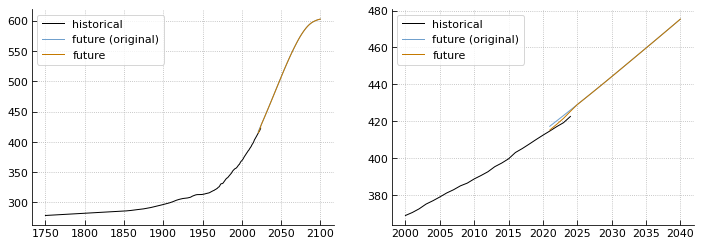

In [134]:
myplt.init_regular(2, col=2)

ax = myplt(0)

data = [d_hist, d_future, d_merged]
labels = ['historical', 'future (original)', 'future']

for d1, label in zip(data, labels):
    ax.plot(d1.index, d1, label=label)

ax.legend()
ax.grid()

ax = myplt(1)

for d1, label in zip(data, labels):
    d1 = d1.loc[2000:2040]
    ax.plot(d1.index, d1, label=label)

ax.legend()
ax.grid()